In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# import data
filename = 'extended4B_data.xlsx'
xl = pd.ExcelFile(filename)

# extract Fp data for each sample
fhr = xl.parse('extended4b_clean', index_col = 0, header = 0).reset_index()

# transform to long format for downstream process
fhr_long = pd.melt(fhr, id_vars='index', value_name='FHR fraction')
fhr_long.rename(columns = {'variable':'Replicate', 'index':'SampleID'}, inplace = True)

fhr_long

,SampleID,Replicate,FHR fraction
0,sp (-oriT),rep1,0.617886
1,sp (+oriT),rep1,1.003436
2,NT (+oriT),rep1,1.109489
3,Msp1 (+oriT),rep1,0.655738
4,Msp2 (+oriT),rep1,1.025997
5,Msp3 (+oriT),rep1,1.178571
6,sp (-oriT),rep2,1.317073
7,sp (+oriT),rep2,0.810997
8,NT (+oriT),rep2,0.846715
9,Msp1 (+oriT),rep2,0.580796


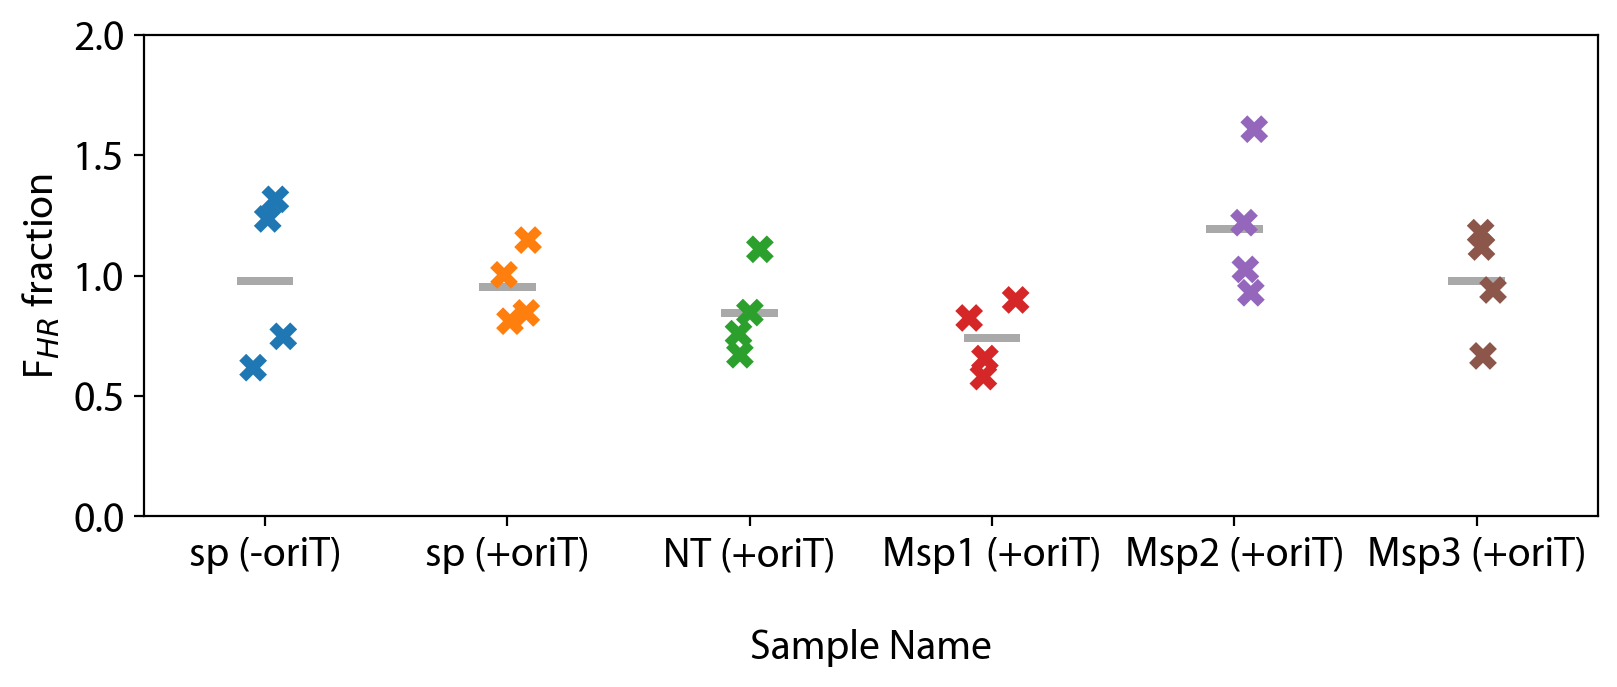

In [3]:
fig, axes = plt.subplots(1, 1, figsize = (8,3), sharey = False, dpi = 200)
plt.tight_layout()
plt.rcParams['font.sans-serif'] = "Myriad Pro"

specs = dict(x="SampleID", y="FHR fraction", data=fhr_long)
sns.stripplot(**specs, ax = axes, marker = 'X', hue = 'SampleID', size= 10)
sns.pointplot(**specs, linestyle='none', errorbar=('ci',0), capsize=.2, markers=None, color='darkgray')

axes.set_ylim([0, 2.0])
axes.set_yticks([0, 0.5, 1.0, 1.5, 2.0])
axes.set_xlabel('\nSample Name', fontsize = 15)
axes.set_ylabel(r'F$_{HR}$ fraction', fontsize = 15)
axes.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('extended_fig4b.svg', format='svg',bbox_inches='tight', pad_inches=0.1)

plt.show()